# Stock Market Analysis

We will be looking at and analyzing data from the stock market. Using pandas, seaborn, and matplotlib to get the stock information and analysis, visualize different aspects of analysis, and analyze risk of various stocks using previous performance history.  Also use Monte Carlo method to predict future stock prices.

In [98]:
#Install data reader to get stock info from yahoo
#pip install pandas-datareader

In [129]:
#Imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import scipy.stats as stats

#for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
import pandas_datareader as pdr
from pandas_datareader import data as wb

# For time stamps
from datetime import datetime

# For division
from __future__ import division

## Questions to analyze

1) What was the change in price of the stock over time?

2) What was the daily return of the stock on average?

3) What was the moving average of the various stocks?

4) What was the correlation between different stocks closing prices?

5) What was the correlation between different stocks daily returns?

6) How much value do we put at risk by investing in a particular stock?

7) How can we attempt to predict future stock behavior?

### Basic Analysis of Stock Infromation

Use Yahoo and pandas to get data from some tech stocks

In [100]:
#Create list of tech stocks to analyze
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [101]:
#Setup start and end times for data grab
end = datetime.now()
start = datetime(end.year-1,end.month,end.day) 

In [102]:
#Grab data
AAPL = pdr.get_data_yahoo('AAPL', start, end)
GOOG = pdr.get_data_yahoo('GOOG', start, end)
MSFT = pdr.get_data_yahoo('MSFT', start, end)
AMZN = pdr.get_data_yahoo('AMZN', start, end)

In [103]:
#Summary stats for Apple
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,120.973234,117.905446,119.555298,119.449712,1.245264e+08,119.054349
std,13.137854,12.947596,13.155370,13.017755,5.393529e+07,13.135242
min,86.419998,83.144997,83.312500,84.699997,4.669130e+07,84.133095
25%,115.982500,112.657499,114.520002,114.832500,8.819405e+07,114.269588
50%,123.649998,120.369999,122.164997,121.869999,1.113192e+08,121.572643
75%,129.727501,126.772501,128.540001,127.950003,1.508143e+08,127.717728
max,145.089996,141.369995,143.600006,143.160004,3.743368e+08,142.704010


In [105]:
#General info for Apple
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-06-12 to 2021-06-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    float64
 5   Adj Close  252 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


Weve looked at what included in the DataFrame, so lets plot out the volume and closing price of Apple

<AxesSubplot:xlabel='Date'>

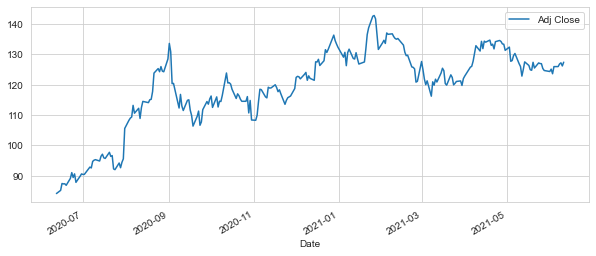

In [106]:
#Visualization of past closing prices
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

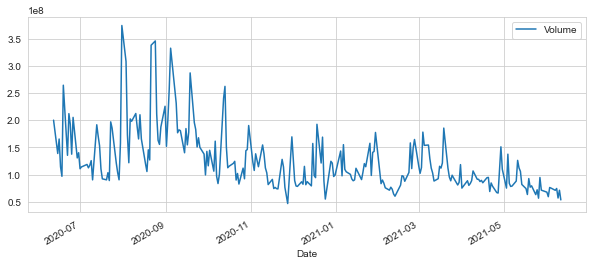

In [108]:
#Plot of total volume of stock being traded each day
AAPL['Volume'].plot(legend=True,figsize=(10,4))

Weve looked at the closing price and volumes traded each day for Apple over the last year. Now lets calculate the moving average for the close over 10, 20, and 50 days

In [111]:
#Calculate moving averages for 10, 20, 50 days
ma_day = [10,20,50]

for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

Now that we have moving averages calculated, lets visualize them.

<AxesSubplot:xlabel='Date'>

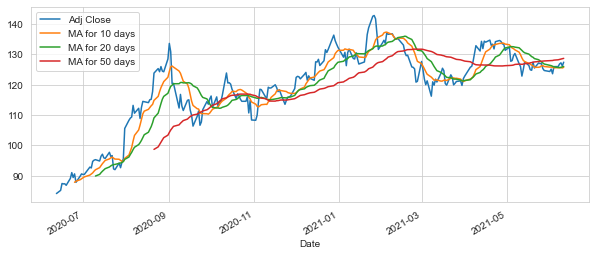

In [110]:
AAPL[['Adj Close','MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False,figsize=(10,4))

### Daily Return Analysis

After looking at a basic analysis of Apple, lets begin to look at the risk of the stock.  We will need to begin by looking at the daily returns.

In [113]:
#Use pct_change to calculate the percent change each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

<AxesSubplot:xlabel='Date'>

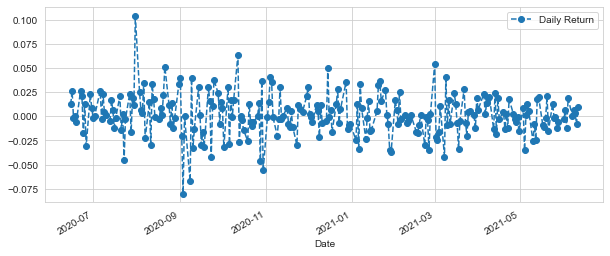

In [115]:
#Plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(10,4), legend=True, linestyle='--',marker='o')

Now let use seaborn to get a histogram and kde plot for the same daily return percentages

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

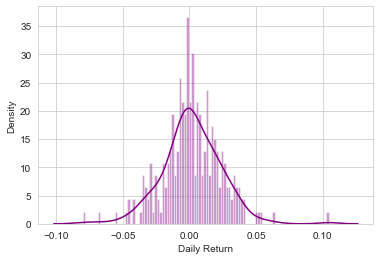

In [37]:
#Plot histogram and use dropna to remove all NaN values
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

<AxesSubplot:>

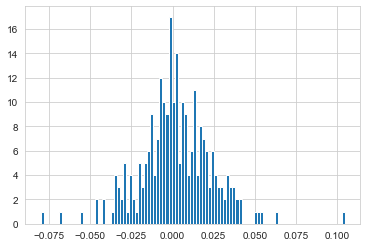

In [116]:
#Another histogram plot of Apple
AAPL['Daily Return'].hist(bins=100)

Lets look at all the tech stocks in our list

In [117]:
#Make a new dataframe of all the closing prices of the tech stocks in our list
closing_df = pdr.get_data_yahoo(tech_list, start, end)['Adj Close']

In [119]:
#Preview dataframe
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-06-12,84.133095,1413.180054,185.939621,2545.020020
2020-06-15,85.173584,1419.849976,187.128113,2572.679932
2020-06-16,87.430885,1442.719971,191.713745,2615.270020
2020-06-17,87.309204,1451.119995,192.377289,2640.979980
2020-06-18,87.343979,1435.959961,194.437363,2653.979980


We have the DataFrame of the closing prices, now lets get the daily returns of these stocks

In [120]:
tech_rets = closing_df.pct_change()

Now we can compare the daily percentage return of two stocks.

First lets look at Google compared to itself

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


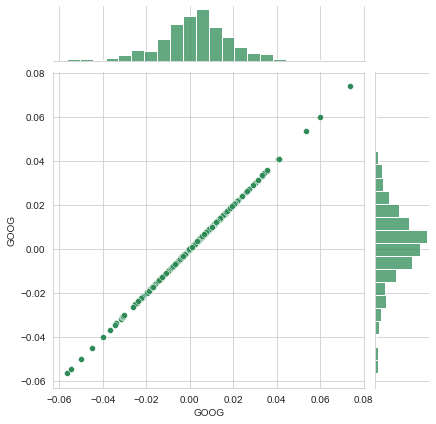

In [131]:
sns.jointplot('GOOG','GOOG',tech_rets,kind = 'scatter',color='seagreen')

As expected, we see a perfect and positive correlation since we are comparing the same stock to each other.

Now lets compare Google and Microsoft to each other in the same way to view their relationship

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


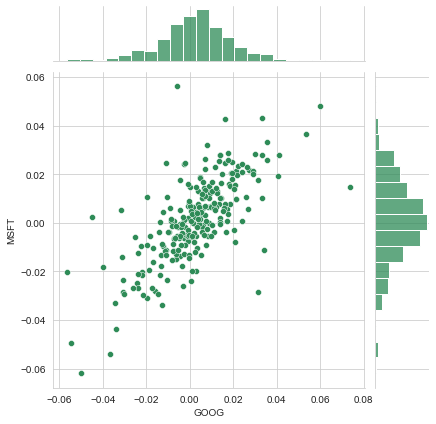

In [124]:
sns.jointplot('GOOG','MSFT',tech_rets,kind = 'scatter',color='seagreen')

We see a positive correlation between the two stocks. Lets check out this with all the tech stocks at once.

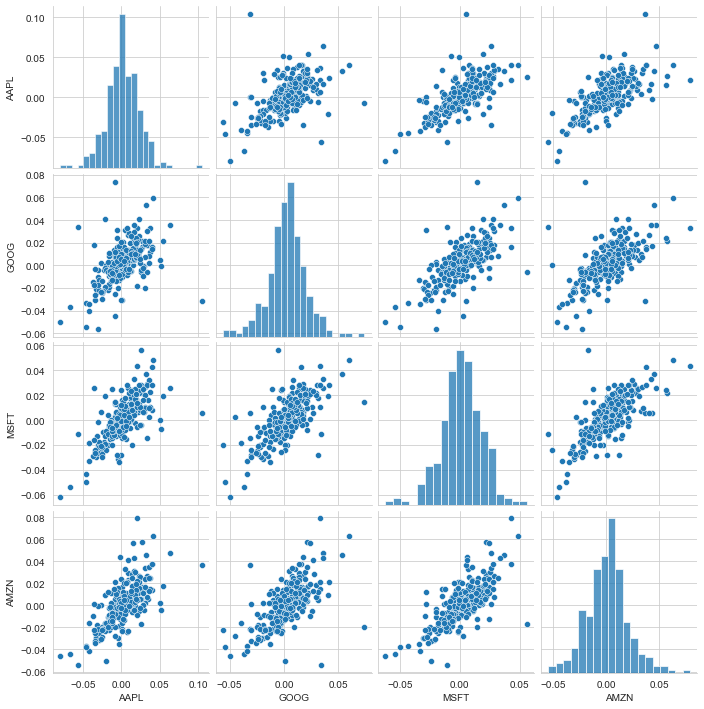

In [133]:
#Visualize all stocks in list at once with a pair plot
sns.pairplot(tech_rets.dropna())

All relationships show a positive correlation. We will run a correlation test to get their pearson values to help determine most direct relationship but all stocks daily returns appear to be similar relationship to each other.

Lets use PairGrid to get a kdeplot included in the grid to investigate further

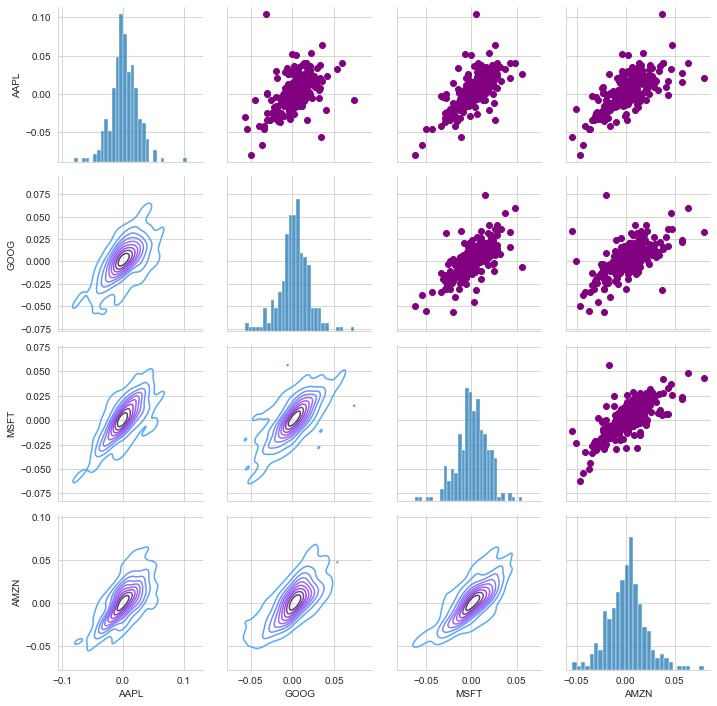

In [136]:
#Create pairgrid to includes kdeplots
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(sns.histplot,bins=30)

Nows lets do the same with the closing prices

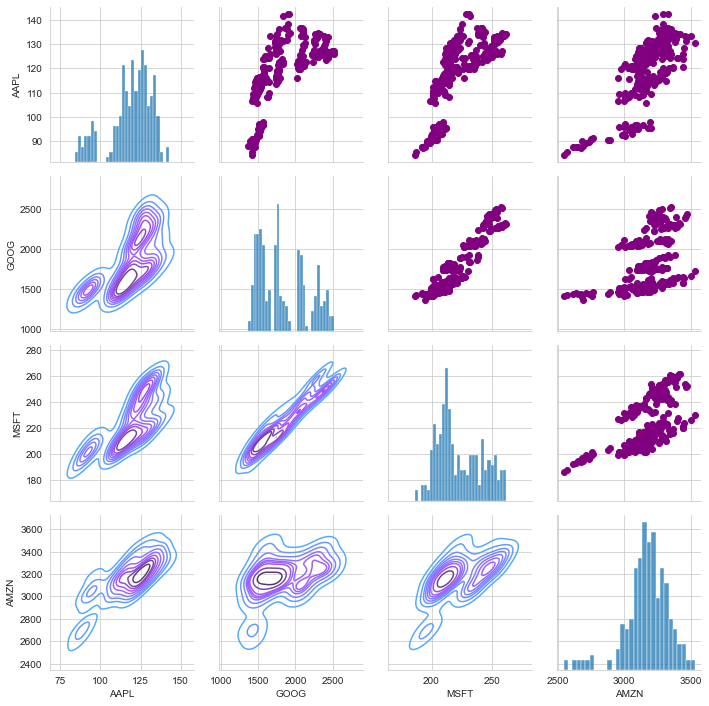

In [135]:
#Use pair grid again to visualize closing prices
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(sns.histplot,bins=30)

See an overall positive relationsihp between all stocks.  Amazons relationship were more neutral than other due to their closing price being fairly stable over last year.  See a very direct relationsihp between google and microsoft here

Lets get the correlation data between the stocks

In [141]:
#Create correlation data for daily returns
corr_rets = tech_rets.corr()

corr_rets

Symbols,AAPL,GOOG,MSFT,AMZN
Symbols,,,,
AAPL,1.000000,0.505557,0.688174,0.685343
GOOG,0.505557,1.000000,0.700824,0.624505
MSFT,0.688174,0.700824,1.000000,0.738924
AMZN,0.685343,0.624505,0.738924,1.000000


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

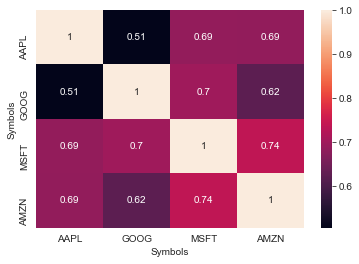

In [142]:
#Plot correlation data using a heatmap
sns.heatmap(corr_rets,annot=True)

As expected from the visualizations, all stocks had a high positive correlation between their daily returns with microsoft and amazon being the highest

Lets look at the correlations for the closing prices now

In [145]:
#Create correlation data for closing prices
corr_close = closing_df.corr()

corr_close

Symbols,AAPL,GOOG,MSFT,AMZN
Symbols,,,,
AAPL,1.000000,0.672805,0.743300,0.772655
GOOG,0.672805,1.000000,0.946116,0.458864
MSFT,0.743300,0.946116,1.000000,0.620064
AMZN,0.772655,0.458864,0.620064,1.000000


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

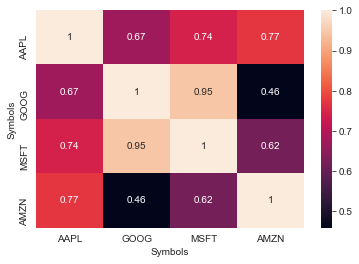

In [146]:
#Plot correlation data using a heatmap
sns.heatmap(corr_close,annot=True)

Again, we get what we expected. All postiive correlations with google and microsoft being very closely correlated at .95

Weve seen the positive relationships between these tech stocks over the last year, now lets look at a risk analysis

## Risk Analysis

Many ways to quantify risk.  One of the most basic ways is by using the daily percentage returns data already gather and using the expected return with the standard deviation of the daily returns

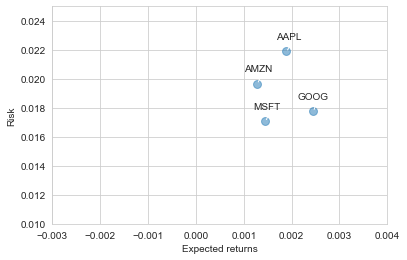

In [148]:
#Get a new DataFrame and drop NaN
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(), alpha = 0.5,s=area)

#Set x and y limits
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#Set plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

#Label scatter plot
#http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (15, 10),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

See Google seems to have the highest expected return with less risk than apple or amazons stock using this method

Lets treat "value at risk" as the amount of money we could expect to lose (aka putting at risk) for a given C.I.

**Value at risk using the "bootstrap" method**
For this method we will calculate empirical quantiles from a histogram of daily returns. 


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

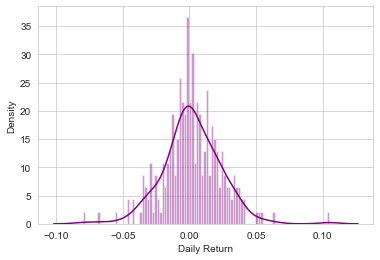

In [150]:
#Plot the historgram of Apple again
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

Now we can use the quantile to get the risk value for the stock

In [152]:
#0.05 empirical quantile of daily returns
rets['AAPL'].quantile(0.05)

-0.03315361479370249

The 0.05 empirical quantile of daily returns is -0.033.  This means that with 95% confidence, the worst daily loss will not exceed 3.3%.  Thus if we invested 1 million dollars into apple, the 1-day 5% VaR is 0.033*1,000,000 = $33,000.

Lets compare this with the other tech stocks

In [160]:
quant = {}
for s in tech_list:
    q = rets[s].quantile(0.05)
    quant[s] = q

In [162]:
quant

{'AAPL': -0.03315361479370249,
 'GOOG': -0.02820798528720614,
 'MSFT': -0.027499588639915584,
 'AMZN': -0.02994135982097096}

We see similar risks between the stocks using the bootstrap method as well with apple being the highest risk and microsoft the lowest

**Risk using the monte carlo method**

Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

The equation for geometric Browninan motion is given by the following equation:

$$\frac{\Delta S}{S} = \mu\Delta t + \sigma \epsilon \sqrt{\Delta t}$$
Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.

$$ \Delta S = S(\mu\Delta t + \sigma \epsilon \sqrt{\Delta t}) $$
Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each tiem period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

To demonstrate this, we will do just a few simualtions using the GOOG dataframe

In [165]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

Create a function that will be able to input the starting price and number of days, as well as the already calculated sigma and mu

In [166]:
def stock_monte_carlo(start_price, days, mu, sigma):
    
    #Define a price array
    price = np.zeros(days)
    price[0] = start_price
    
    #Shock and drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    #Run price array for number of days
    for x in range(1,days):
        #Calculate shock
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        #Calculate drift
        drift[x] = mu *dt
        #Calculate price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    return price

In [167]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-12,1437.000000,1386.020020,1428.489990,1413.180054,1946400,1413.180054
2020-06-15,1424.800049,1387.920044,1390.800049,1419.849976,1503900,1419.849976
2020-06-16,1455.020020,1425.900024,1445.219971,1442.719971,1709200,1442.719971
2020-06-17,1460.000000,1431.380005,1447.160034,1451.119995,1549600,1451.119995
2020-06-18,1451.410034,1427.010010,1449.160034,1435.959961,1581900,1435.959961


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

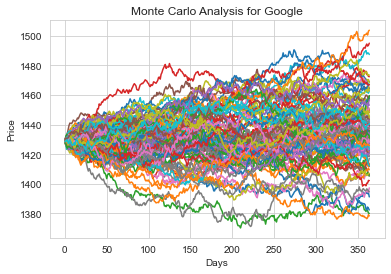

In [169]:
#Get start price from previous cell
start_price=1428.48
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

Lets get a histogram of the end results for a larger run.

In [170]:
runs = 10000

simulations = np.zeros(runs)
for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

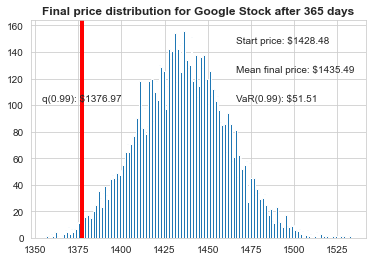

In [171]:
q = np.percentile(simulations,1)

plt.hist(simulations, bins=200)

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

Here we can see the 1% empirical quantile of the final price distribution to estiamte the Value at Risk for Google, which was %51.51 for every investment of 1428.48.  

So every share of Google invested in, there is about $51.51 at risk 99 percent of the time based on our monte carlo simulation.

Based on previous analysis, we should expect to see similar risk in the other previous tech stocks.

So lets look at a few other more recent volatile stocks.


## Risk management analysis of more volatile stocks

Lets use Tesla, Gamestop, and Target for other stocks to analyze risk

In [173]:
#Create list of these stocks with their ticker
vol_list = ['TSLA','GME','TGT']

In [174]:
#Grab data for each stock off yahoo
TSLA = pdr.get_data_yahoo('TSLA', start, end)
GME = pdr.get_data_yahoo('GME', start, end)
TGT = pdr.get_data_yahoo('TGT', start, end)

Now we need to get the closing price data and calculate the daily returns for each stock

In [179]:
closing_df_vol = pdr.get_data_yahoo(vol_list, start, end)['Adj Close']
vol_rets = closing_df_vol.pct_change()

In [180]:
vol_rets.head()

Symbols,TSLA,GME,TGT
Date,,,
2020-06-12,NaN,NaN,NaN
2020-06-15,0.059469,-0.006356,0.010693
2020-06-16,-0.008851,-0.010661,0.008972
2020-06-17,0.009836,0.025862,-0.007885
2020-06-18,0.012271,0.039916,-0.008201


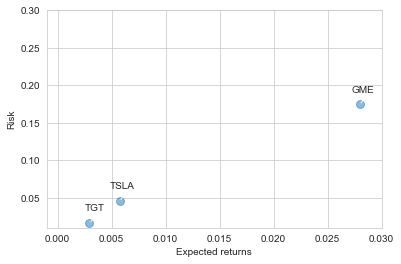

In [196]:
#Get a new DataFrame and drop NaN
rets = vol_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(), alpha = 0.5,s=area)

#Set x and y limits
plt.ylim([0.01,.3])
plt.xlim([-0.001,.03])

#Set plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

#Label scatter plot
#http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (15, 10),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

As expected we see much higher returns and risk with GME with its recent run upwards of almost 5000% in a very short period.  

In [197]:
quant_vol = {}
for s in vol_list:
    q = rets[s].quantile(0.05)
    quant_vol[s] = q

In [198]:
quant_vol

{'TSLA': -0.058358629618802116,
 'GME': -0.11077037970379816,
 'TGT': -0.01764185647450328}

Using the bootstrap method above we can again see higher risk in GME and then TSLA compared to TGT. Again with a 1 million dollar investment, with 95% confidence the largest amount of money lost in day in GME would be $110,770 compared to TGT at $17,000.

Lets look at the monte carlo simulation of TSLA next.

In [201]:
TSLA.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-12,197.595993,182.520004,196.000000,187.056000,83817000.0,187.056000
2020-06-15,199.768005,181.699997,183.557999,198.179993,78486000.0,198.179993
2020-06-16,202.576004,192.477997,202.369995,196.425995,70255500.0,196.425995
2020-06-17,201.000000,196.514008,197.542007,198.358002,49454000.0,198.358002
2020-06-18,203.839996,198.893997,200.600006,200.792007,48759500.0,200.792007


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

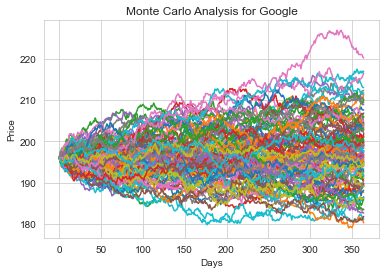

In [203]:
#Need to recalulate mu and sigma
mu = vol_rets.mean()['TSLA']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = vol_rets.std()['TSLA']

#Get start price from previous cell
start_price=196
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [204]:
runs = 10000

simulations = np.zeros(runs)
for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

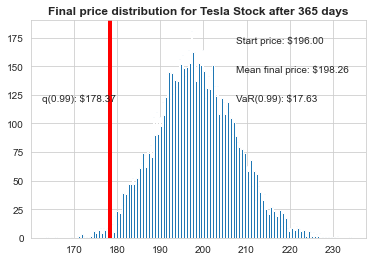

In [205]:
q = np.percentile(simulations,1)

plt.hist(simulations, bins=200)

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Tesla Stock after %s days" % days, weight='bold');

Here we can see the 1% empirical quantile of the final price distribution to estiamte the Value at Risk for Tesla, which was $17.63 for every investment of 196.00 dollars.

So every share of Tesla invested in, there is about $17.63 at risk 99 percent of the time based on our monte carlo simulation.

With the 1% emprical quantile VaR of Google at abour 3 percent of the initial investment and Tesla at almost 9%, Google appears to be the less risky stock for an investment. 